<a href="https://colab.research.google.com/github/alexgonzl/ssrp_srec_python_workshop_2021/blob/master/ssrp_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SSRP Instructor notebook for pandas section 

* Date: D4-June 17,2021
* pandas docs: https://pandas.pydata.org/docs/



In [ ]:
import pandas as pd

Read Covid data into data frame

In [ ]:
covid_live_counties=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv')

In [ ]:
covid_live_counties

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2021-06-07,Autauga,Alabama,1001.0,7206,113.0,6024.0,101.0,1182.0,12.0
1,2021-06-07,Baldwin,Alabama,1003.0,21724,312.0,15259.0,234.0,6465.0,78.0
2,2021-06-07,Barbour,Alabama,1005.0,2343,59.0,1306.0,41.0,1037.0,18.0
3,2021-06-07,Bibb,Alabama,1007.0,2667,64.0,2139.0,40.0,528.0,24.0
4,2021-06-07,Blount,Alabama,1009.0,6916,139.0,5283.0,115.0,1633.0,24.0
...,...,...,...,...,...,...,...,...,...,...
3243,2021-06-07,Sweetwater,Wyoming,56037.0,4597,39.0,4381.0,NaN,216.0,NaN
3244,2021-06-07,Teton,Wyoming,56039.0,3789,9.0,3702.0,NaN,87.0,NaN
3245,2021-06-07,Uinta,Wyoming,56041.0,2290,13.0,1958.0,NaN,332.0,NaN
3246,2021-06-07,Washakie,Wyoming,56043.0,924,26.0,724.0,NaN,200.0,NaN


We've got 3246 observations (rows) and 10 features per observations

### Slicing columns

We can select a subset of features. For example, if we only want county, state, cases, confirmed cases. 

In [ ]:
covid_live_counties[['county','state','cases','confirmed_cases']]

,county,state,cases,confirmed_cases
0,Autauga,Alabama,7206,6024.0
1,Baldwin,Alabama,21724,15259.0
2,Barbour,Alabama,2343,1306.0
3,Bibb,Alabama,2667,2139.0
4,Blount,Alabama,6916,5283.0
...,...,...,...,...
3243,Sweetwater,Wyoming,4597,4381.0
3244,Teton,Wyoming,3789,3702.0
3245,Uinta,Wyoming,2290,1958.0
3246,Washakie,Wyoming,924,724.0


It looks like what we want so we store this result into a variable

In [ ]:
covid_live_counties_simple = covid_live_counties[['county','state','cases','confirmed_cases','deaths']]

### Slicing rows

By row number with iloc

In [ ]:
covid_live_counties_simple.iloc[5:10] # equivalent to covid_live_counties_simple.iloc[5:10,:]

,county,state,cases,confirmed_cases,deaths
5,Bullock,Alabama,1240,1093.0,42.0
6,Butler,Alabama,2225,2003.0,71.0
7,Calhoun,Alabama,14681,10959.0,325.0
8,Chambers,Alabama,3704,1830.0,124.0
9,Cherokee,Alabama,1869,1187.0,45.0


Using a conditional statement with loc. For example, let's select california

In [ ]:
covid_live_counties_simple['state']

0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
3243    Wyoming
3244    Wyoming
3245    Wyoming
3246    Wyoming
3247    Wyoming
Name: state, Length: 3248, dtype: object

Selecting a column returns a Series. We can test entry by entry whether a condition is satisfied

In [ ]:
covid_live_counties_simple['state']=='California'

0       False
1       False
2       False
3       False
4       False
        ...  
3243    False
3244    False
3245    False
3246    False
3247    False
Name: state, Length: 3248, dtype: bool

Another way of doing the above is with the '.' selection method for columns. With the benefit that columns can be autocompleted in notebook environments.

In [ ]:
covid_live_counties_simple.state=='California'

0       False
1       False
2       False
3       False
4       False
        ...  
3243    False
3244    False
3245    False
3246    False
3247    False
Name: state, Length: 3248, dtype: bool

Below we can make sure that both methods result in the same output by comparing the results, and using the `.all()` method for pandas series.

In [ ]:
((covid_live_counties_simple.state=='California') == (covid_live_counties_simple['state']=='California')).all()

True

This Series of booleans is appropriate for slicing with `.loc`

In [ ]:
covid_live_counties_simple.loc[covid_live_counties_simple['state']=='California']

,county,state,cases,confirmed_cases,deaths
186,Alameda,California,89168,89168.0,1702.0
187,Alpine,California,89,88.0,0.0
188,Amador,California,3695,3695.0,47.0
189,Butte,California,12527,12527.0,194.0
190,Calaveras,California,2193,2181.0,56.0
191,Colusa,California,2272,1959.0,18.0
192,Contra Costa,California,70003,70003.0,817.0
193,Del Norte,California,1441,1441.0,8.0
194,El Dorado,California,10315,10294.0,115.0
195,Fresno,California,102642,102642.0,1717.0


In [ ]:
covid_live_counties_simple_CA = covid_live_counties_simple.loc[covid_live_counties_simple['state']=='California']

Let's plot!

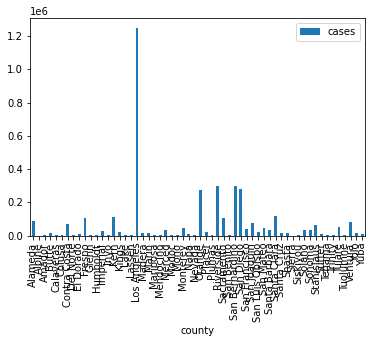

In [ ]:
covid_live_counties_simple_CA.plot.bar(x='county',y='cases')

Let's add another column taking the log10 of cases to make it easier to visualize across California counties.

In [ ]:
import numpy as np
# a bit more on numpy tomorrow.

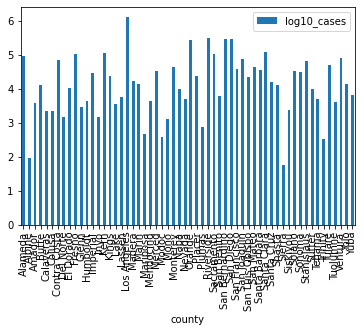

In [ ]:
covid_live_counties_simple_CA = pd.DataFrame(covid_live_counties_simple_CA) # this step makes a deep copy of the data frame
covid_live_counties_simple_CA['log10_cases'] = np.log10(covid_live_counties_simple_CA['cases'])
covid_live_counties_simple_CA.plot.bar(x='county',y='log10_cases')

### Sorting and filtering by rank

In [ ]:
covid_live_counties_simple_CA.sort_values('cases', ascending=False)

,county,state,cases,confirmed_cases,deaths,log10_cases
204,Los Angeles,California,1245788,1245120.0,24410.0,6.095444
218,Riverside,California,301013,301013.0,4618.0,5.478585
221,San Bernardino,California,298697,298697.0,4773.0,5.475231
222,San Diego,California,280806,280806.0,3764.0,5.448406
215,Orange,California,272447,255473.0,5083.0,5.435282
228,Santa Clara,California,119711,119711.0,2156.0,5.078134
200,Kern,California,110395,110395.0,1398.0,5.042949
219,Sacramento,California,106960,106960.0,1716.0,5.029221
195,Fresno,California,102642,102642.0,1717.0,5.011325
186,Alameda,California,89168,89168.0,1702.0,4.950209


Let's get the top 20 counties

In [ ]:
covid_live_counties_simple_CA_top20=covid_live_counties_simple_CA.sort_values('cases', ascending=False).head(20)
covid_live_counties_simple_CA_top20

,county,state,cases,confirmed_cases,deaths,log10_cases
204,Los Angeles,California,1245788,1245120.0,24410.0,6.095444
218,Riverside,California,301013,301013.0,4618.0,5.478585
221,San Bernardino,California,298697,298697.0,4773.0,5.475231
222,San Diego,California,280806,280806.0,3764.0,5.448406
215,Orange,California,272447,255473.0,5083.0,5.435282
228,Santa Clara,California,119711,119711.0,2156.0,5.078134
200,Kern,California,110395,110395.0,1398.0,5.042949
219,Sacramento,California,106960,106960.0,1716.0,5.029221
195,Fresno,California,102642,102642.0,1717.0,5.011325
186,Alameda,California,89168,89168.0,1702.0,4.950209


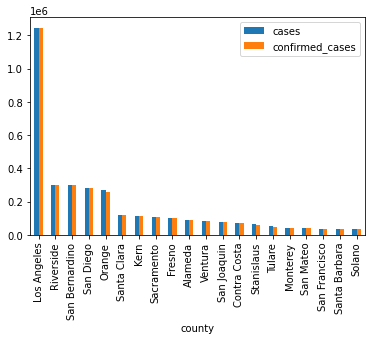

In [ ]:
covid_live_counties_simple_CA_top20.plot.bar(x='county', y=['cases','confirmed_cases'])

In [ ]:
covid_live_counties_simple_CA_top20.mean()

cases              172883.200000
confirmed_cases    171668.150000
deaths               2943.500000
log10_cases             5.003571
dtype: float64

In [ ]:
covid_live_counties_simple_CA_top20.sum()

county             Los AngelesRiversideSan BernardinoSan DiegoOra...
state              CaliforniaCaliforniaCaliforniaCaliforniaCalifo...
cases                                                        3457664
confirmed_cases                                          3.43336e+06
deaths                                                         58870
log10_cases                                                  100.071
dtype: object

In [ ]:
covid_live_counties.sum()

date                2021-06-072021-06-072021-06-072021-06-072021-0...
county              AutaugaBaldwinBarbourBibbBlountBullockButlerCa...
state               AlabamaAlabamaAlabamaAlabamaAlabamaAlabamaAlab...
fips                                                      1.01271e+08
cases                                                        33382877
deaths                                                         597533
confirmed_cases                                           2.17208e+07
confirmed_deaths                                               376955
probable_cases                                            2.34912e+06
probable_deaths                                                 30138
dtype: object

## Groupby
This method allows aggregation for a specific categorical variable, for example `state`.

In [ ]:
group_by_state=covid_live_counties_simple.groupby('state')

The `.count()` method provides counts for each of the states. Because, each entry corresponds to a county, the resulting values will simply provide how many counties are in that state.

In [ ]:
group_by_state.count().head()

,county,cases,confirmed_cases,deaths
state,,,,
Alabama,67,67,67,67
Alaska,28,28,0,28
Arizona,15,15,0,15
Arkansas,76,76,76,76
California,58,58,58,58


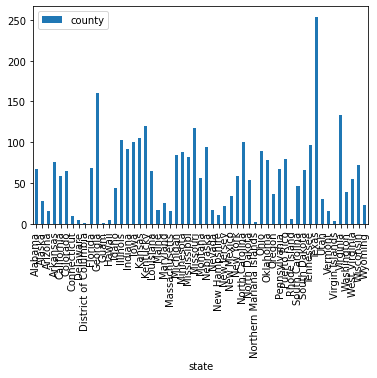

In [ ]:
group_by_state.count().plot.bar(y='county', )

We can use the `.get_group()` method to filter the data frame for a single group.

In [ ]:
group_by_state.get_group('New York').head()

,county,state,cases,confirmed_cases,deaths
1847,Albany,New York,24675,24675.0,355.0
1848,Allegany,New York,3549,3549.0,87.0
1849,Broome,New York,18599,18599.0,365.0
1850,Cattaraugus,New York,5716,5716.0,90.0
1851,Cayuga,New York,6329,6329.0,92.0


And we can use the `.head(n)` method to return `n` entries per group.

In [ ]:
group_by_state.head(3)

,county,state,cases,confirmed_cases,deaths
0,Autauga,Alabama,7206,6024.0,113.0
1,Baldwin,Alabama,21724,15259.0,312.0
2,Barbour,Alabama,2343,1306.0,59.0
67,Aleutians East Borough,Alaska,367,NaN,3.0
68,Aleutians West Census Area,Alaska,708,NaN,0.0
...,...,...,...,...,...
3154,Ashland,Wisconsin,1396,1287.0,15.0
3155,Barron,Wisconsin,6035,5876.0,84.0
3225,Albany,Wyoming,4540,4007.0,15.0
3226,Big Horn,Wyoming,1194,962.0,34.0


We can also use the `.sort_values()` method to re-order the rows according to one of our columns, let's do 'cases'.

In [ ]:
group_by_state.get_group('New York').sort_values('cases', ascending=False).head()

,county,state,cases,confirmed_cases,deaths
1875,New York City,New York,951084,935848.0,33307.0
1894,Suffolk,New York,200766,200766.0,3397.0
1874,Nassau,New York,183422,183422.0,3173.0
1902,Westchester,New York,129506,129506.0,2285.0
1860,Erie,New York,89472,89472.0,1800.0


Apply summary operation to a groupby object. Applying the `.max()` will attempt to find the max value for each column.



In [ ]:
group_by_state.max().head()

,county,cases,confirmed_cases,deaths
state,,,,
Alabama,Winston,80681,70084.0,1549.0
Alaska,Yukon-Koyukuk Census Area,30620,NaN,174.0
Arizona,Yuma,552781,NaN,10112.0
Arkansas,Yell,40002,34264.0,668.0
California,Yuba,1245788,1245120.0,24410.0


Note, however, that entries for each row are now unliked, that is, Yuba county in California did not have 1245788 cases, simly that applying 'max' to the column 'county' returns the maximum value of the strings in that column (i.e. Yuba > San Francisco).

Finally, lets select the top two counties per state and plot the counts. To accomplish this, we will need a series of operations.

In [ ]:
n_counties = 2
top_counties_by_state = covid_live_counties_simple.sort_values(['cases'], ascending=[False]).groupby('state').head(n_counties)
top_counties_by_state

,county,state,cases,confirmed_cases,deaths
204,Los Angeles,California,1245788,1245120.0,24410.0
1875,New York City,New York,951084,935848.0,33307.0
615,Cook,Illinois,555060,NaN,10934.0
102,Maricopa,Arizona,552781,NaN,10112.0
364,Miami-Dade,Florida,501925,NaN,6472.0
...,...,...,...,...,...
2918,Rutland,Vermont,2278,NaN,20.0
3058,St. Thomas,Virgin Islands,1913,1913.0,17.0
3056,St. Croix,Virgin Islands,1401,1401.0,10.0
2059,Saipan,Northern Mariana Islands,181,181.0,2.0


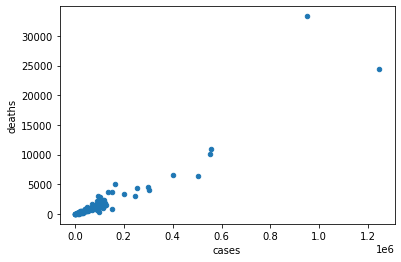

In [ ]:
top_counties_by_state.plot.scatter(x='cases',y='deaths')

## Lets directly compute the Case-Fatality Rate by state

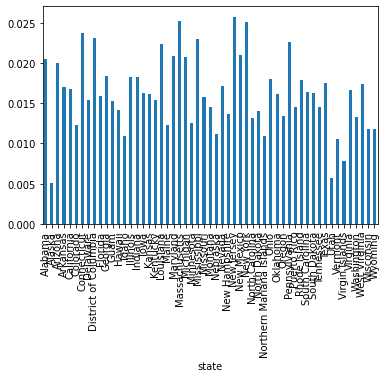

In [ ]:
totals_by_state = group_by_state.sum()
cfr = totals_by_state.deaths/totals_by_state.cases
cfr.plot.bar()

# Other examples / exercises

Time evolution in California

In [ ]:
covid_history=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
covid_history.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Data types?

In [ ]:
covid_history.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

We want the date to be represented as a date, not a string

In [ ]:
pd.to_datetime(covid_history['date'], infer_datetime_format=True)


0       2020-01-21
1       2020-01-22
2       2020-01-23
3       2020-01-24
4       2020-01-24
           ...    
25364   2021-06-06
25365   2021-06-06
25366   2021-06-06
25367   2021-06-06
25368   2021-06-06
Name: date, Length: 25369, dtype: datetime64[ns]

In [ ]:
covid_history['date']=pd.to_datetime(covid_history['date'], infer_datetime_format=True)

In [ ]:
covid_history.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

## Changing index

In [ ]:
covid_history_ca = covid_history.loc[covid_history['state']=='California']

In [ ]:
covid_history_ca

,date,state,fips,cases,deaths
5,2020-01-25,California,6,1,0
9,2020-01-26,California,6,2,0
13,2020-01-27,California,6,2,0
17,2020-01-28,California,6,2,0
21,2020-01-29,California,6,2,0
...,...,...,...,...,...
25098,2021-06-02,California,6,3791972,63287
25153,2021-06-03,California,6,3793055,63345
25208,2021-06-04,California,6,3794235,63393
25263,2021-06-05,California,6,3795063,63423


Remove the state column

In [ ]:
covid_history_ca=covid_history_ca.drop('state', axis=1)

In [ ]:
covid_history_ca.head()

,date,fips,cases,deaths
5,2020-01-25,6,1,0
9,2020-01-26,6,2,0
13,2020-01-27,6,2,0
17,2020-01-28,6,2,0
21,2020-01-29,6,2,0


Change the index to date

In [ ]:
covid_history_ca = covid_history_ca.set_index('date')
covid_history_ca.head()

,fips,cases,deaths
date,,,
2020-01-25,6,1,0
2020-01-26,6,2,0
2020-01-27,6,2,0
2020-01-28,6,2,0
2020-01-29,6,2,0


In [ ]:

#import matplotlib as mp

Plot time evolution

In [ ]:
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f30e9b88f10>,
      dtype=object)

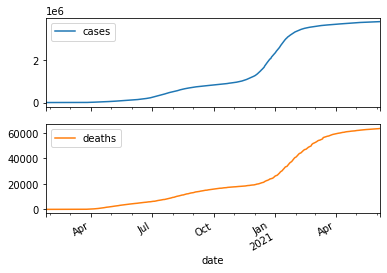

In [ ]:
covid_history_ca.reset_index().plot.line(x='date',y=['cases','deaths'], subplots=True)

## Adding column to dataframe

In [ ]:
x= covid_history_ca['deaths']/covid_history_ca['cases']*100

Text(0, 0.5, 'Deaths per 100 cases')

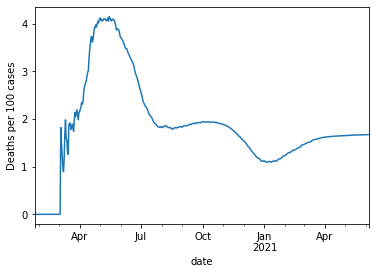

In [ ]:
ax=x.plot.line()
ax.set_ylabel('Deaths per 100 cases')

In [ ]:
covid_history_ca['percent_death']=x

In [ ]:
covid_history_ca.head()

,fips,cases,deaths,percent_death
date,,,,
2020-01-25,6,1,0,0.0
2020-01-26,6,2,0,0.0
2020-01-27,6,2,0,0.0
2020-01-28,6,2,0,0.0
2020-01-29,6,2,0,0.0
